In [ ]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [3]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

df = pd.DataFrame(data)

In [8]:
print(f"shape: {df.shape}")
print(f"size: {df.size}")
print(f"dtype: {df.dtypes}")

shape: (11, 4)
size: 44
dtype: birds        object
age         float64
visits        int64
priority     object
dtype: object


In [10]:
# display alternate rows of df
df.loc[::2, :]

,birds,age,visits,priority
0,Cranes,3.5,2,yes
2,plovers,1.5,3,no
4,spoonbills,6.0,3,no
6,plovers,5.5,2,no
8,spoonbills,8.0,3,no
10,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [12]:
df.loc[[0,2,6], ['birds', 'age']]

,birds,age
0,Cranes,3.5
2,plovers,1.5
6,plovers,5.5


In [13]:
df[df['visits'] < 4]

,birds,age,visits,priority
0,Cranes,3.5,2,yes
2,plovers,1.5,3,no
4,spoonbills,6.0,3,no
6,plovers,5.5,2,no
7,Cranes,NaN,2,yes
8,spoonbills,8.0,3,no
9,spoonbills,4.0,2,no
10,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [14]:
df[(df['age'].isna()) & (df['visits'].isna())]

# there are no rows where both age and visits are nan

,birds,age,visits,priority


In [17]:
# filling age and visits with nan values

df['age'] = df['age'].fillna(df['age'].mode().iat[0])
df['visits'] = df['visits'].fillna(df['visits'].mode().iat[0])

###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [20]:
df[df['birds'] == 'Cranes']['visits'].sum()

14

In [21]:
# number of birds of each kind
df['birds'].value_counts()

Cranes        5
spoonbills    4
plovers       2
Name: birds, dtype: int64

In [22]:
# number of duplicate rows

df.duplicated().sum()

2

In [23]:
# display duplicated rows
df[df.duplicated()]

,birds,age,visits,priority
7,Cranes,3.5,2,yes
10,Cranes,3.5,2,yes


In [24]:
# drop duplicate rows permanently
df = df.drop_duplicates()

In [25]:
df.shape

# 2 duplicate rows have been dropped

(9, 4)

##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [27]:
data=  pd.read_csv('/content/IPL_Matches_2008_2022.csv')
data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [30]:
data['Team1'] = data['Team1'].replace('Delhi Daredavils', 'Delhi Capitals')
data['Team2'] = data['Team2'].replace('Delhi Daredavils', 'Delhi Capitals')

data['Team1'] = data['Team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data['Team2'] = data['Team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

data['Team1'] = data['Team1'].replace('Kings XI Punjab', 'Punjab Kings')
data['Team2'] = data['Team2'].replace( 'Kings XI Punjab', 'Punjab Kings')

###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


In [ ]:
# code here

In [32]:
data[(data['Team1'] == 'Rajasthan Royals') | (data['Team2'] == 'Rajasthan Royals')]['ID'].count()

192

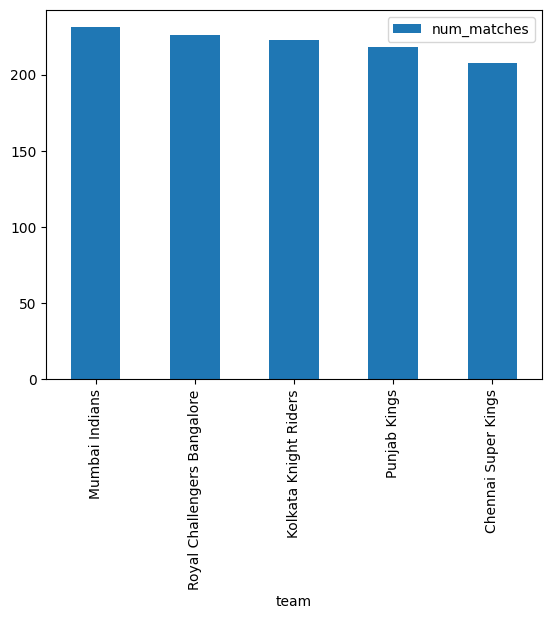

In [43]:
teams_list = data['Team1'].unique().tolist()
matches = []

for team in teams_list:
  num_matches = data[(data['Team1'] == team) | (data['Team2'] == team)]['ID'].count()
  matches.append(num_matches)

df = pd.DataFrame({'team' : teams_list,
                   'num_matches' : matches})

df.sort_values(by='num_matches', ascending=False).head(5).plot(x='team', kind='bar');

In [38]:
df

,team,num_matches
0,Rajasthan Royals,192
1,Royal Challengers Bangalore,226
2,Sunrisers Hyderabad,152
3,Delhi Capitals,63
4,Chennai Super Kings,208
5,Gujarat Titans,16
6,Lucknow Super Giants,15
7,Kolkata Knight Riders,223
8,Punjab Kings,218
9,Mumbai Indians,231


###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [49]:
temp_df = data[(data['Team1'] == 'Mumbai Indians') | (data['Team2'] == 'Mumbai Indians')]
temp_df.groupby('Player_of_Match')['ID'].count().sort_values(ascending=False).head(5)

Player_of_Match
RG Sharma       16
KA Pollard      14
AT Rayudu        8
SR Tendulkar     8
JJ Bumrah        8
Name: ID, dtype: int64

###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [67]:
temp_df = data[(data['Team1'].isin(['Kolkata Knight Riders','Chennai Super Kings'])) & (data['Team2'].isin(['Kolkata Knight Riders','Chennai Super Kings']))]
total_matches = temp_df.shape[0]
csk_wins = temp_df.groupby('WinningTeam')['ID'].count()[0]
kkr_wins = temp_df.groupby('WinningTeam')['ID'].count()[1]
pom_df = temp_df.groupby('Player_of_Match')['ID'].count()

In [76]:
def dashboard(team1, team2):

  '''This function takes 2 team names as input and returns the following:
  1. number of matches played between teh 2 teams
  2. number of matches won by each team
  3. player of the match for all the matches'''

  temp_df = data[(data['Team1'].isin([team1, team2])) & (data['Team2'].isin([team1, team2]))]
  total_matches = temp_df.shape[0]
  wins = temp_df.groupby('WinningTeam')['ID'].count()
  pom_df = pd.DataFrame(temp_df.groupby('Player_of_Match')['ID'].count())

  result = pd.DataFrame({'total_matches' : total_matches,
                         'wins' : wins})

  return result, pom_df

In [77]:
dashboard('Chennai Super Kings', 'Kolkata Knight Riders')

(                       total_matches  wins
 WinningTeam                               
 Chennai Super Kings               26    17
 Kolkata Knight Riders             26     9,
                  ID
 Player_of_Match    
 AD Russell        1
 BJ Hodge          1
 DJ Bravo          1
 DL Chahar         1
 F du Plessis      2
 G Gambhir         1
 Imran Tahir       1
 Iqbal Abdulla     1
 JDP Oram          1
 M Ntini           1
 MEK Hussey        2
 MS Bisla          1
 MS Dhoni          1
 R Ashwin          1
 RA Jadeja         3
 RA Tripathi       1
 RD Gaikwad        1
 RV Uthappa        1
 S Anirudha        1
 SP Narine         1
 SW Billings       1
 UT Yadav          1)

### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



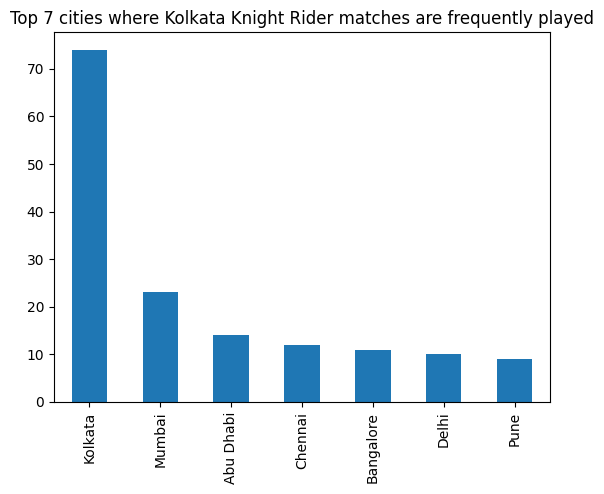

In [91]:
(data[((data['Team1'] == 'Kolkata Knight Riders') | (data['Team2'] == 'Kolkata Knight Riders'))]['City']
 .value_counts()
 .sort_values(ascending=False)
 .head(7)
 .plot(kind='bar', x='City'))

plt.title('Top 7 cities where Kolkata Knight Rider matches are frequently played');

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [86]:
avg_margin = data[((data['Team1'] == 'Mumbai Indians') | (data['Team2'] == 'Mumbai Indians')) & (data['Season'] == '2011')]['Margin'].mean()
print(f"Average margin of mumbain indians in season 2011 : {avg_margin}")

Average margin of mumbain indians in season 2011 : 19.25
